       Kcal(morning)  Kcal(lunch)  Kcal(Dinner)
Month                                          
09        627.714286  1011.142857    988.857143
10        664.150000  1069.850000    925.800000
11        607.142857  1005.095238    951.809524
12        628.956522  1025.666667    968.238095
       Protein(morning)  Protein(lunch)  Protein(dinner)
Month                                                   
09            25.000000       37.142857        40.142857
10            26.400000       38.350000        39.850000
11            26.333333       33.666667        38.904762
12            21.478261       34.761905        42.476190


Text(0, 0.5, 'Protein')

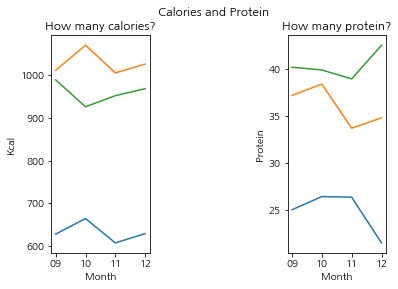

In [3]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='NanumGothic')

req1 = requests.get('https://dorm.chungbuk.ac.kr/home/sub.php?menukey=20041&cur_day=2020-09-24&type=1')
req2 = requests.get('https://dorm.chungbuk.ac.kr/home/sub.php?menukey=20041&cur_day=2020-10-01&type=1')
req3 = requests.get('https://dorm.chungbuk.ac.kr/home/sub.php?menukey=20041&cur_day=2020-10-08&type=1')
req4 = requests.get('https://dorm.chungbuk.ac.kr/home/sub.php?menukey=20041&cur_day=2020-10-15&type=1')
req5 = requests.get('https://dorm.chungbuk.ac.kr/home/sub.php?menukey=20041&cur_day=2020-10-22&type=1')
req6 = requests.get('https://dorm.chungbuk.ac.kr/home/sub.php?menukey=20041&cur_day=2020-10-29&type=1')
req7 = requests.get('https://dorm.chungbuk.ac.kr/home/sub.php?menukey=20041&cur_day=2020-11-05&type=1')
req8 = requests.get('https://dorm.chungbuk.ac.kr/home/sub.php?menukey=20041&cur_day=2020-11-12&type=1')
req9 = requests.get('https://dorm.chungbuk.ac.kr/home/sub.php?menukey=20041&cur_day=2020-11-19&type=1')
req10 = requests.get('https://dorm.chungbuk.ac.kr/home/sub.php?menukey=20041&cur_day=2020-11-26&type=1')
req11 = requests.get('https://dorm.chungbuk.ac.kr/home/sub.php?menukey=20041&cur_day=2020-12-03&type=1')
req12 = requests.get('https://dorm.chungbuk.ac.kr/home/sub.php?menukey=20041&cur_day=2020-12-10&type=1')
req13 = requests.get('https://dorm.chungbuk.ac.kr/home/sub.php?menukey=20041&cur_day=2020-12-17&type=1')
req14 = requests.get('https://dorm.chungbuk.ac.kr/home/sub.php?menukey=20041&cur_day=2020-12-24&type=1')
req15 = requests.get('https://dorm.chungbuk.ac.kr/home/sub.php?menukey=20041&cur_day=2020-12-31&type=1')

reqs = [req1, req2, req3, req4, req5, req6, req7, req8, req9, req10, req11, req12, req13, req14, req15]

dataframe = []

for i in range(15):
    html = reqs[i].text
    soup = BeautifulSoup(html, 'html.parser')
    titles = soup.find_all('tr', {'id':re.compile('\d{4}-\d{2}-\d{2}')})
    for content in titles:
        data = []
        cnt = 0
        for child in content.select('td'):
            temp = (BeautifulSoup(str(child).replace('<br/>', ' ')).text)
            if temp == ' ':
                continue
            if cnt == 0:
                data.append(temp.split()[0])
                date = temp.split()[1]
                year = date.split('-')[0]
                month = date.split('-')[1]
                day = date.split('-')[2]
                data.append(year)
                data.append(month)
                data.append(day)
                cnt = cnt + 1       
            else:
                menu = temp.split('에너지:')[0]
                menu = menu.lstrip()
                menu = menu.rstrip()
                cal_and_protein = temp.split('에너지:')[1]
                cal_and_protein = cal_and_protein.replace(' ','')
                cal = cal_and_protein.split('단백질:')[0]
                protein = cal_and_protein.split('단백질:')[1]
                data.append(menu.replace(' ', '/'))
                data.append(int(cal.replace('Kcal', '')))
                data.append(int(protein.replace('g', '')))
        dataframe.append(data)
        

df = pd.DataFrame(dataframe, columns = ['Day of the Week','Year', 'Month', 'Day', 'Breckfast', 'Kcal(morning)', 'Protein(morning)', 'Lunch', 'Kcal(lunch)', 'Protein(lunch)', 'Dinner', 'Kcal(Dinner)', 'Protein(dinner)'])
Kcal = df.groupby('Month')[['Kcal(morning)', 'Kcal(lunch)', 'Kcal(Dinner)']].mean()
Protein = df.groupby('Month')[['Protein(morning)', 'Protein(lunch)', 'Protein(dinner)']].mean()
print(Kcal)
print(Protein)
fig = plt.figure()
axes1 = fig.add_subplot(1,3,1)
axes2 = fig.add_subplot(1,3,3)
axes1.plot(Kcal)
axes2.plot(Protein)
fig.suptitle('Calories and Protein')

axes1.set_title('How many calories?')
axes1.set_xlabel('Month')
axes1.set_ylabel('Kcal')

axes2.set_title('How many protein?')
axes2.set_xlabel('Month')
axes2.set_ylabel('Protein')